In [2]:
import numpy as np
import os
import pandas as pd
import math

from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u

from eventio.simtel.simtelfile import SimTelFile
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [3]:
path = '/mnt/yggdrasil_sim/mono-lst-sipm-borofloat-3ns-v1_triggerless/gamma_diffuse_nsbx1/output/'
file = 'corsika_run156.simtel.gz'

In [5]:
def find_files(path):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    
    files = []
    for i_file in onlyfiles:
        if i_file[0] != '.':
            files.append(i_file)
            
    return files

In [6]:
files = find_files(path)

In [7]:
files

['corsika_run1923.simtel.gz',
 'corsika_run1905.simtel.gz',
 'corsika_run351.simtel.gz',
 'corsika_run1655.simtel.gz',
 'corsika_run492.simtel.gz',
 'corsika_run1104.simtel.gz',
 'corsika_run1265.simtel.gz',
 'corsika_run1388.simtel.gz',
 'corsika_run1205.simtel.gz',
 'corsika_run444.simtel.gz',
 'corsika_run1334.simtel.gz',
 'corsika_run751.simtel.gz',
 'corsika_run1048.simtel.gz',
 'corsika_run1218.simtel.gz',
 'corsika_run73.simtel.gz',
 'corsika_run1239.simtel.gz',
 'corsika_run978.simtel.gz',
 'corsika_run738.simtel.gz',
 'corsika_run789.simtel.gz',
 'corsika_run969.simtel.gz',
 'corsika_run1238.simtel.gz',
 'corsika_run536.simtel.gz',
 'corsika_run1743.simtel.gz',
 'corsika_run1007.simtel.gz',
 'corsika_run381.simtel.gz',
 'corsika_run710.simtel.gz',
 'corsika_run1749.simtel.gz',
 'corsika_run1347.simtel.gz',
 'corsika_run449.simtel.gz',
 'corsika_run156.simtel.gz',
 'corsika_run1926.simtel.gz',
 'corsika_run1286.simtel.gz',
 'corsika_run1780.simtel.gz',
 'corsika_run1188.simtel.

In [8]:
n_events = 1000

df = pd.DataFrame(columns=['energy', 'n_pe'])
e_total = []
ch_total = []

for i_file in files:
    
    print("file : ", i_file)
    source = EventSource(path+i_file, max_events=n_events, back_seekable=True) 
    for event in source:
        e = event.simulation.shower.energy.to_value(u.TeV)
        ch = event.simulation.tel[1]['true_image'].sum()
        #df.loc[event.count] = (e, ch)
        e_total.append(e)
        ch_total.append(ch)
        

file :  corsika_run1923.simtel.gz
file :  corsika_run1905.simtel.gz
file :  corsika_run351.simtel.gz
file :  corsika_run1655.simtel.gz
file :  corsika_run492.simtel.gz
file :  corsika_run1104.simtel.gz
file :  corsika_run1265.simtel.gz
file :  corsika_run1388.simtel.gz
file :  corsika_run1205.simtel.gz
file :  corsika_run444.simtel.gz
file :  corsika_run1334.simtel.gz
file :  corsika_run751.simtel.gz
file :  corsika_run1048.simtel.gz
file :  corsika_run1218.simtel.gz
file :  corsika_run73.simtel.gz
file :  corsika_run1239.simtel.gz
file :  corsika_run978.simtel.gz
file :  corsika_run738.simtel.gz
file :  corsika_run789.simtel.gz
file :  corsika_run969.simtel.gz
file :  corsika_run1238.simtel.gz
file :  corsika_run536.simtel.gz
file :  corsika_run1743.simtel.gz
file :  corsika_run1007.simtel.gz
file :  corsika_run381.simtel.gz
file :  corsika_run710.simtel.gz
file :  corsika_run1749.simtel.gz
file :  corsika_run1347.simtel.gz
file :  corsika_run449.simtel.gz
file :  corsika_run156.simte

In [9]:
data = {'p.e. sum': ch_total, 'energy TeV': e_total}
df = pd.DataFrame(data=data)

In [10]:
df

p.e. sum  energy TeV
0             1    0.005220
1             7    0.018786
2            18    0.018786
3             3    0.018786
4             4    0.018786
...         ...         ...
39995         2    0.008774
39996        40    0.017881
39997         2    0.017881
39998         1    0.017881
39999         1    0.017881

[40000 rows x 2 columns]

In [10]:
file_name = "/home/andrii/work/sim_telarray/analysis/energy_1k.dat"
file_object  = open(file_name, "w") 

file_object.write("# line \t p.e. sum \t energy TeV \n")
for i in range(len(ch_total)):
    file_object.write("{:.1f} {:.1f} {:.18f} \n".format(i, ch_total[i], e_total[i]))

file_object.close() 

In [12]:
e_total_log = np.log(e_total)
ch_total_log = np.log(ch_total)

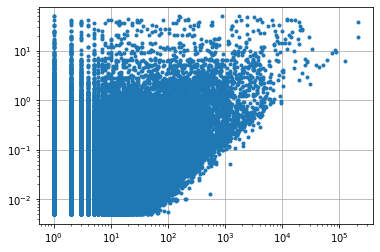

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(ch_total, e_total, '.')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [ ]:
plt.hist(ch_total, bins='auto')

/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


ValueError: Contour levels must be increasing

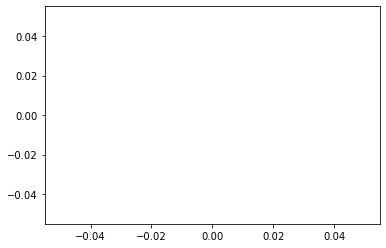

In [27]:
sns.kdeplot(ch_total, e_total, shade=True, shade_lowest=False)
plt.xscale('log')
plt.yscale('log')

In [17]:
df['p.e. sum']

0           1
1           3
2           2
3          14
4          22
           ..
1999995     2
1999996     1
1999997    13
1999998     1
1999999     8
Name: p.e. sum, Length: 2000000, dtype: int64

/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/andrii/anaconda3/envs/cta/lib/python3.7/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='p.e. sum', ylabel='energy TeV'>

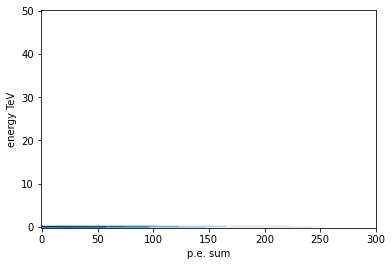

In [18]:
sns.kdeplot(df['p.e. sum'], df['energy TeV'], cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))

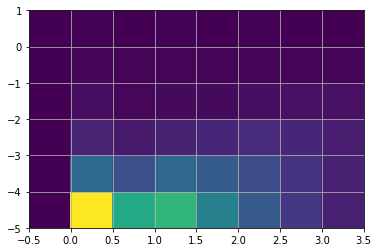

In [13]:
plt.hist2d(ch_total_log, e_total_log, range = [[-0.5, 3.5], [-5, 1]], bins=[8,6])
plt.grid(True)
plt.show()

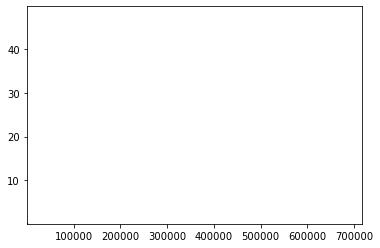

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_scatter_density  # noqa

from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

ax.scatter_density(ch_total, e_total, color='black')

In [24]:
e_total

[0.005220244638621807,
 0.008188302628695965,
 0.008188302628695965,
 0.01878562942147255,
 0.01878562942147255,
 0.01878562942147255,
 0.01878562942147255,
 0.01496678963303566,
 0.01496678963303566,
 0.005961849819868803,
 0.009240279905498028,
 0.006011364050209522,
 0.006011364050209522,
 0.012174488045275211,
 0.017821626737713814,
 0.005140073597431183,
 0.005140073597431183,
 0.08520736545324326,
 0.08520736545324326,
 0.08520736545324326,
 0.007685109507292509,
 0.04075560346245766,
 0.04075560346245766,
 0.04075560346245766,
 0.04075560346245766,
 0.005789484363049269,
 0.005789484363049269,
 0.10846442729234695,
 0.10846442729234695,
 0.10846442729234695,
 0.10846442729234695,
 0.033873628824949265,
 0.033873628824949265,
 0.033873628824949265,
 0.008550629951059818,
 0.008550629951059818,
 0.008550629951059818,
 0.008550629951059818,
 0.008550629951059818,
 0.02025921456515789,
 0.009431082755327225,
 0.005822327919304371,
 0.005575840827077627,
 0.005756163038313389,
 0.005

MemoryError: Unable to allocate 18.6 GiB for an array with shape (50001, 50001) and data type float64

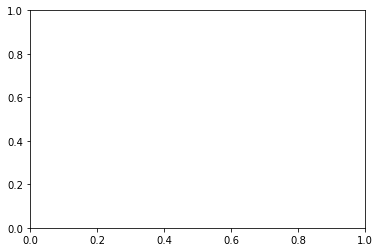

In [40]:
plt.hist2d(ch_total, e_total, bins=50000, cmap='Blues')
cb = plt.colorbar()
plt.xscale('log')
plt.yscale('log')
cb.set_label('counts in bin')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
sns.heatmap(data = df)
plt.title('Title')
#plt.ylim(0.04, 1.2)
#plt.xlim(0.9, 800)
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
#plt.legend()
plt.xlabel('Light Intensity, gammas')
plt.ylabel('Chrage resolution')
#plt.plot(pe_poisson, charge_resolution_poisson_gammas, '--r')
#plt.savefig('charge_resolution_all_nsb.png', dpi=1800)
#plt.show()

Text(33.0, 0.5, 'Chrage resolution')

ValueError: math domain error